<a href="https://colab.research.google.com/github/dilek-gokalp/dilek-gokalp/blob/main/crypto_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


bitcoin_file = "/content/Bitcoin.csv"
ethereum_file = "/content/ethereum.csv"

# Load dataset
bitcoin_df = pd.read_csv(bitcoin_file)
ethereum_df = pd.read_csv(ethereum_file)


bitcoin_head = bitcoin_df.head()
ethereum_head = ethereum_df.head()

bitcoin_head, ethereum_head


(         Date          Open          High           Low         Close  \
 0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
 1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
 2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
 3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
 4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   
 
      Volume Currency  
 0  952850.0      USD  
 1  131077.0      USD  
 2   83052.0      USD  
 3   76227.0      USD  
 4   84485.0      USD  ,
         date   Open   High    Low  Close  price Currency
 0  3/10/2016  11.20  11.85  11.07  11.75      4      USD
 1  3/11/2016  11.75  11.95  11.75  11.95    179      USD
 2  3/12/2016  11.95  13.45  11.95  12.92    833      USD
 3  3/13/2016  12.92  15.07  12.92  15.07   1295      USD
 4  3/14/2016  15.07  15.07  11.40  12.50  92183      USD)

In [ ]:
# Missing value control
missing_values_bitcoin = bitcoin_df.isnull().sum()
missing_values_ethereum = ethereum_df.isnull().sum()

missing_values_bitcoin, missing_values_ethereum


(Date        0
 Open        0
 High        0
 Low         0
 Close       0
 Volume      0
 Currency    0
 dtype: int64,
 date        0
 Open        0
 High        0
 Low         0
 Close       0
 price       0
 Currency    0
 dtype: int64)

In [ ]:
bitcoin_price_stats = bitcoin_df["Close"].describe()
bitcoin_price_stats

,Close
count,1151.000000
mean,26496.733082
std,17952.113609
min,4936.755371
25%,9712.636719
50%,20902.404297
75%,41782.333984
max,67502.421875


In [ ]:

ethereum_price_stats = ethereum_df["price"].describe()
ethereum_price_stats


,price
count,2.358000e+03
mean,1.269467e+07
std,1.014013e+08
min,0.000000e+00
25%,5.465530e+05
50%,1.429778e+06
75%,7.717627e+06
max,1.792561e+09


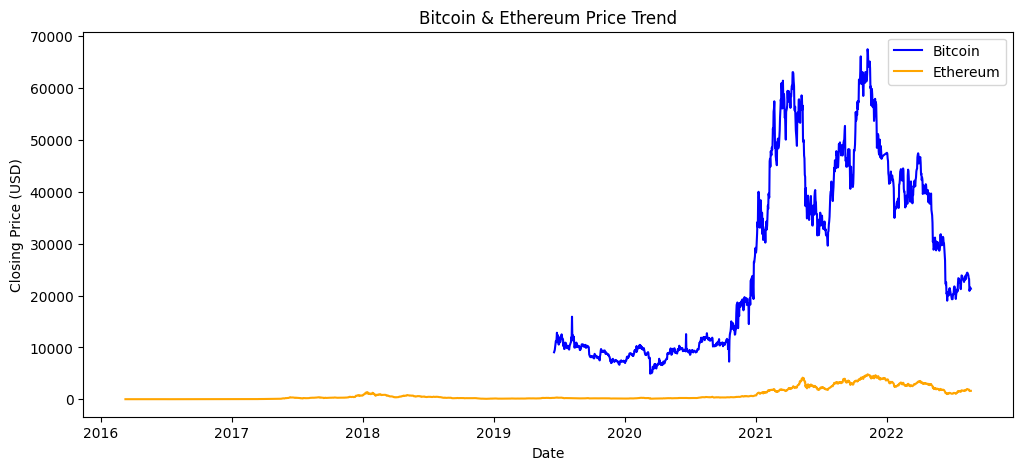

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert dates to the same format
bitcoin_df["Date"] = pd.to_datetime(bitcoin_df["Date"])  # Bitcoin date is already YYYY-MM-DD
ethereum_df["date"] = pd.to_datetime(ethereum_df["date"], format='%m/%d/%Y', dayfirst=False)  # Ethereum date is MM/DD/YYYY or try format='mixed'  # Ethereum date is DD/MM/YYYY

# Plot Bitcoin and Ethereum closing prices
plt.figure(figsize=(12, 5))
plt.plot(bitcoin_df["Date"], bitcoin_df["Close"], label="Bitcoin", color="blue")
plt.plot(ethereum_df["date"], ethereum_df["Close"], label="Ethereum", color="orange")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Bitcoin & Ethereum Price Trend")
plt.legend()

# Show the chart
plt.show()


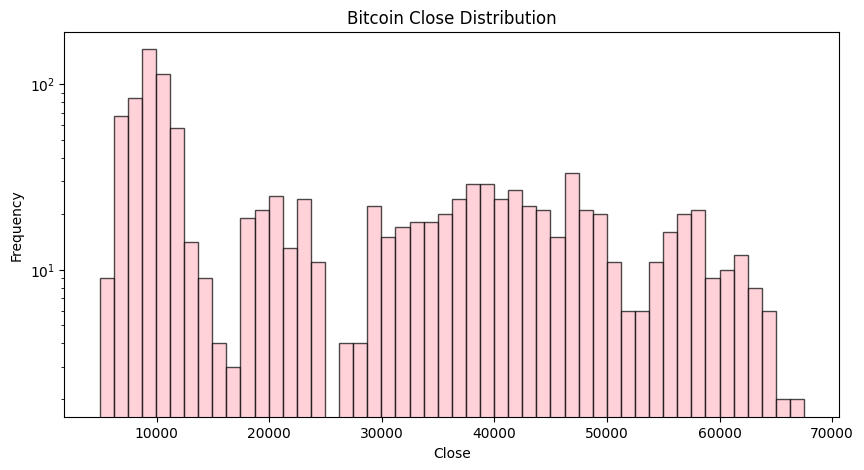

In [ ]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(bitcoin_df["Close"], bins=50, color="pink", alpha=0.7, edgecolor="black")
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.title("Bitcoin Close Distribution")
plt.yscale("log")
plt.show()

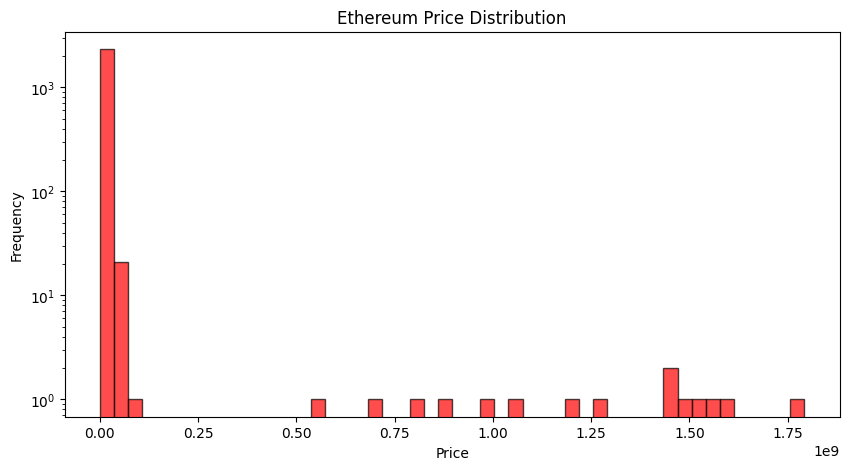

In [ ]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(ethereum_df["price"], bins=50, color="red", alpha=0.7, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Ethereum Price Distribution")
plt.yscale("log")
plt.show()


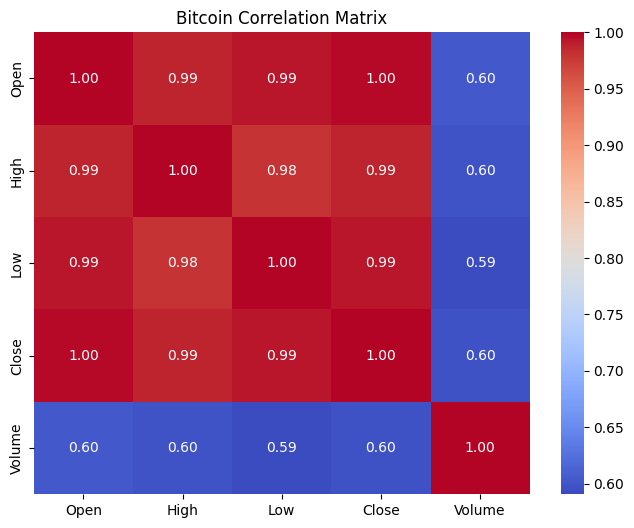

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = bitcoin_df[["Open", "High", "Low", "Close", "Volume"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Bitcoin Correlation Matrix")
plt.show()


PHASE 2 FEATURE SELECTION

Close    1.000000
High     0.999105
Low      0.999084
Open     0.998139
price    0.100646
Name: Close, dtype: float64


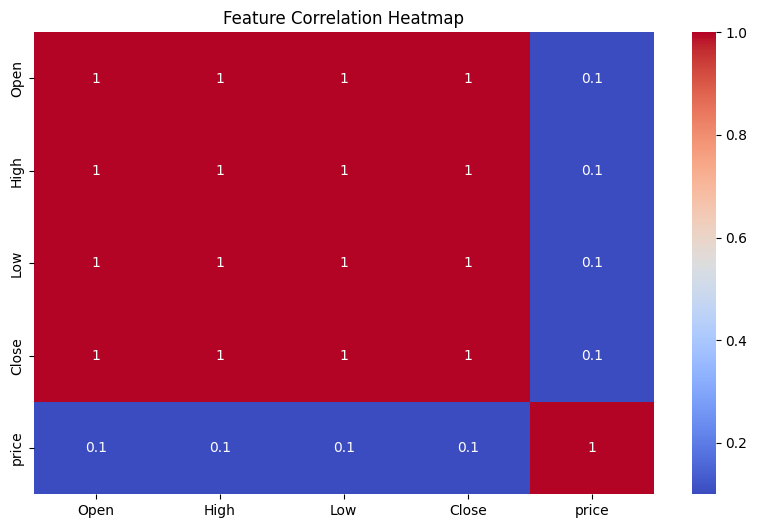

In [ ]:
import pandas as pd
import numpy as np    #this is filter method: filter method use statistical test to evaluate the relationship
import seaborn as sns  #between input features and the target variable.
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Bitcoin.csv")
df = pd.read_csv("ethereum.csv")

# Exclude the 'Date' column before calculating correlation
numeric_df = df.select_dtypes(include=np.number)



# Compute correlation with target variable
correlation = numeric_df.corr()["Close"].sort_values(ascending=False)
print(correlation)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = bitcoin_df[["Open", "High", "Low", "Volume"]]
y = bitcoin_df["Close"]

# Use a simple linear regression model
model = LinearRegression()

# Apply RFE to select the top 3 features
selector = RFE(model, n_features_to_select=3)
selector = selector.fit(X, y)

# Print selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Open', 'High', 'Low'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso

# Load bitcoin_df before using it
bitcoin_df = pd.read_csv("Bitcoin.csv") # Assuming 'Bitcoin.csv' is the correct file name and path
X = bitcoin_df[["Open", "High", "Low", "Volume"]]
y = bitcoin_df["Close"]

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
lasso_coeffs = pd.Series(lasso_model.coef_, index=X.columns)
print("LASSO Feature Importance:\n", lasso_coeffs)

LASSO Feature Importance:
 Open      0.636410
High      0.124079
Low       0.244436
Volume   -0.000001
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.503e+08, tolerance: 3.706e+07
  model = cd_fast.enet_coordinate_descent(


PHASE 3 MODEL TRANING AND EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = bitcoin_df[["Open", "High", "Low"]]  # Selected important features
y = bitcoin_df["Close"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (920, 3)
Testing data size: (231, 3)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression RMSE:", rmse_lr)


Linear Regression RMSE: 2192.5588053225138


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_knn = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print("KNN RMSE:", rmse_knn)


KNN RMSE: 1387.3180371656533


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 1090.2963396733164


In [ ]:
print("\nModel Performance Comparison:")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"KNN RMSE: {rmse_knn}")
print(f"Random Forest RMSE: {rmse_rf}")



Model Performance Comparison:
Linear Regression RMSE: 2192.5588053225138
KNN RMSE: 1387.3180371656533
Random Forest RMSE: 1090.2963396733164
